# Dimensionality Reduction

## Principal Component Analysis (PCA)
The most popular technique, it first identifies the hyperplanes that lies closest to the data, and the projects the data onto it.

In PCA the first principal component is the axis that accounts for the largest amount of variance in the training set and the second principal component is the axis tat is orthogonal to the first principal component. 

## Singular Value Decomposition (SVD)
This is a method that is used to find the principal components of a training set. it output three values **U,Σ,
V⊺**, where **V⊺** is a vector that defines all the principal components of the training set.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [24]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

sns.set_style('darkgrid')

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
# setting out the features and label array 
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
y = y.astype(np.uint8)

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape, y_test.shape

((60000, 784), (10000,))

In [7]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Finding the principal components

In [8]:
X_centered = X[:1000] - X.mean(axis=0)
eigen_values, S, eigen_vectors = np.linalg.svd(X_centered)
c1 = eigen_vectors[:, 0]
c2 = eigen_vectors[:, 1]

# c1.size, c2.size, c1

In [9]:
# Projecting to  plane
wt = eigen_vectors.T[:, :2]
X_proj = X_train_std.dot(wt)
X_proj[:5]

array([[ -1.65018461,   3.95160672],
       [-11.07438734,   5.01152034],
       [ -0.29985633,  -4.48158209],
       [  9.7997698 ,   6.6779416 ],
       [  3.54808164,  -6.38184124]])

## Using sklearn

In [10]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [11]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445])

In [12]:
pca = PCA().fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)+1

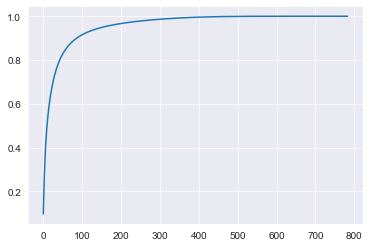

In [13]:
plt.plot(cumsum)
plt.show()

In [17]:
#reducing the feature
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [19]:
X_reduced.shape

(60000, 154)

In [21]:
# Decompressing the dataset
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(60000, 784)

### Randomized PCA

In [23]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)
X_reduced.shape

(60000, 154)

### Testing on a dataset

In [25]:
pca = PCA()
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)


In [27]:
rf = RandomForestClassifier(n_estimators=50, n_jobs=-1).fit(X_train_reduced, y_train)
rf.score(X_train_reduced, y_train)

1.0

In [73]:
rf.score(X_test_reduced, y_test)

0.8968

In [78]:
y_pred = rf.predict(X_test_reduced)

In [72]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred)

0.8968

In [64]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       980
           1       0.98      0.98      0.98      1135
           2       0.85      0.89      0.87      1032
           3       0.85      0.91      0.88      1010
           4       0.89      0.90      0.89       982
           5       0.89      0.83      0.86       892
           6       0.92      0.93      0.92       958
           7       0.90      0.89      0.89      1028
           8       0.88      0.82      0.85       974
           9       0.89      0.84      0.86      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

